In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [109]:
data=pd.read_csv('Downloads/epicurious-recipes-with-rating-and-nutrition/epi_r.csv')

In [110]:
data.shape

(20052, 680)

(array([1836.,    0.,  164.,  124.,    0.,  532., 1489., 5169., 8019.,
        2719.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

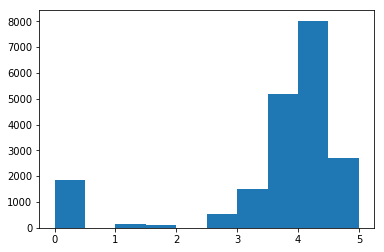

In [111]:
plt.hist(data['rating'])

In [112]:
#data.isnull().mean()*100

In [113]:
data.dropna(inplace=True)

In [114]:
data['rating']=pd.cut(data['rating'], bins=[0,1,2,3,4,5,6], labels=[0,1,2,3,4,5], right=False)

In [115]:
data.rating.head(20)

0     2
1     4
2     3
4     3
5     4
8     4
9     3
10    3
12    4
13    4
14    3
15    4
16    1
17    4
18    5
19    5
20    4
24    3
25    0
26    3
Name: rating, dtype: category
Categories (6, int64): [0 < 1 < 2 < 3 < 4 < 5]

In [126]:
data.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,The Best Blts,4,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [127]:
x=data.drop(['rating','title'], 1)
y=data.loc[:,['rating']].values

In [128]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [129]:
x=StandardScaler().fit_transform(x_train)

In [130]:
from sklearn.decomposition import PCA

In [162]:
pca=PCA(n_components=500)      
principalComponents=pca.fit_transform(x)
pca.explained_variance_ratio_*100

array([1.13583484, 0.93261994, 0.75616983, 0.56583705, 0.54141018,
       0.48754136, 0.46282015, 0.41800716, 0.40097005, 0.38208752,
       0.38138855, 0.37607595, 0.36242718, 0.35686586, 0.3529007 ,
       0.34379536, 0.33784545, 0.33054981, 0.32984473, 0.32395213,
       0.31943166, 0.31519491, 0.31240666, 0.3104644 , 0.30882728,
       0.30721651, 0.30570721, 0.30219376, 0.29658665, 0.2935339 ,
       0.29135964, 0.28983379, 0.28723999, 0.28655165, 0.28282351,
       0.28069863, 0.27983591, 0.27752997, 0.2759801 , 0.27537686,
       0.27235813, 0.27151021, 0.26871314, 0.26703723, 0.26628895,
       0.26395933, 0.26215346, 0.26165809, 0.26008856, 0.2588842 ,
       0.25693386, 0.25569475, 0.25370563, 0.25302507, 0.25192449,
       0.25078088, 0.25033948, 0.24906601, 0.24804218, 0.24598407,
       0.24382494, 0.24259405, 0.24148134, 0.23988764, 0.23906457,
       0.23809099, 0.236797  , 0.23619334, 0.2350862 , 0.23379255,
       0.23362534, 0.23316779, 0.23144333, 0.23066028, 0.23024

In [163]:
sum(pca.explained_variance_ratio_*100)

88.56449295421648

In [138]:
loading_scores=pd.Series(pca.components_[0])
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

In [223]:
features = sorted_loading_scores[0:5].index.values

In [224]:
print(loading_scores[features])

386    0.274765
490   -0.256158
430   -0.253791
589    0.225721
306    0.154108
dtype: float64


In [225]:
loading_scores=pd.Series(pca.components_[1])
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

In [226]:
features = sorted_loading_scores[0:5].index.values

In [227]:
print(loading_scores[features])

180    0.256301
190    0.199677
12     0.195541
36     0.145155
310    0.132059
dtype: float64


In [228]:
loading_scores=pd.Series(pca.components_[2])
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

In [229]:
features = sorted_loading_scores[0:5].index.values

In [230]:
print(loading_scores[features])

12     0.285290
190    0.281727
138    0.210712
137    0.205211
36    -0.189343
dtype: float64


In [231]:
loading_scores=pd.Series(pca.components_[3])
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

In [232]:
features = sorted_loading_scores[0:5].index.values

In [233]:
print(loading_scores[features])

0      0.324022
3      0.321862
2      0.319374
1      0.275286
601   -0.191903
dtype: float64


In [234]:
loading_scores=pd.Series(pca.components_[4])
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

In [235]:
features = sorted_loading_scores[0:5].index.values

In [236]:
print(loading_scores[features])

0      0.383767
3      0.383446
2      0.376976
1      0.309801
601    0.182855
dtype: float64


In [237]:
loading_scores=pd.Series(pca.components_[5])
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

In [238]:
features = sorted_loading_scores[0:5].index.values

In [239]:
print(loading_scores[features])

183    0.215187
638   -0.211217
255    0.194695
254    0.192194
34     0.188362
dtype: float64


In [240]:
loading_scores=pd.Series(pca.components_[6])
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
features = sorted_loading_scores[0:5].index.values
print(loading_scores[features])

34    -0.182664
254   -0.176297
255   -0.168884
620   -0.135635
524   -0.133842
dtype: float64


In [254]:
loading_scores=pd.Series(pca.components_[20])
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
features = sorted_loading_scores[0:5].index.values
print(loading_scores[features])

339    0.222553
203    0.222553
495   -0.152842
244    0.142048
677   -0.138993
dtype: float64


In [183]:
w=data.drop(['rating','title'], 1)

In [255]:
w.columns.values[[0,1,2,3,70,12,386,490,430,589,180,190,138,137,183,34,254,560,404,312,342,551,80,620,446,594,411,282,376,483,318,428,105,339,203]]

array(['calories', 'protein', 'fat', 'sodium', 'breakfast', 'alcoholic',
       'missouri', 'portland', 'oregon', 'st. louis', 'dessert', 'drink',
       'cocktail party', 'cocktail', 'dinner', 'backyard bbq', 'grill',
       'shellfish', 'new orleans', 'kitchen olympics', 'louisiana',
       'seafood', 'brunch', 'thanksgiving', 'party', 'stir-fry',
       'non-alcoholic', 'house cocktail', 'mezcal', 'pomegranate juice',
       'labor day', 'orange juice', 'carrot', 'london', 'england'],
      dtype=object)

In [256]:
X=data[['calories', 'protein', 'fat', 'sodium', 'breakfast', 'alcoholic',
       'missouri', 'portland', 'oregon', 'st. louis', 'dessert', 'drink',
       'cocktail party', 'cocktail', 'dinner', 'backyard bbq', 'grill',
       'shellfish', 'new orleans', 'kitchen olympics', 'louisiana',
       'seafood', 'brunch', 'thanksgiving', 'party', 'stir-fry',
       'non-alcoholic', 'house cocktail', 'mezcal', 'pomegranate juice',
       'labor day', 'orange juice', 'carrot', 'london', 'england']]
Y=data.loc[:,['rating']].values

In [257]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=1)

In [258]:
x=StandardScaler().fit_transform(x_train)

In [259]:
from sklearn.svm import SVC

In [260]:
svm=SVC()

In [261]:
svm.fit(x_train,y_train).score(x_test, y_test)

/Users/laurakim/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/laurakim/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.4995272612669398

In [262]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(svm, X, Y, cv=5))

/Users/laurakim/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/laurakim/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/laurakim/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/laurakim/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will chan

[0.48299748 0.47778128 0.48612863 0.48865069 0.48407442]


In [202]:
#not overfitting but predictive ability is low.  
#But big improvement from score of 0.004 to about 0.5

In [263]:
data.corr()

,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
calories,1.000000,0.742816,0.996538,0.996392,-0.000210,-0.000136,-0.000473,-0.000585,-0.000308,-0.001083,...,-0.000599,-0.002496,-0.000135,-0.000292,-0.001979,-0.000181,-0.000285,-0.000619,-0.000486,-0.002267
protein,0.742816,1.000000,0.712194,0.749287,-0.000324,-0.000201,-0.000466,-0.000758,-0.000258,-0.001244,...,-0.000860,-0.003120,-0.000197,-0.000354,-0.002566,-0.000232,-0.000290,-0.000883,-0.000702,-0.000748
fat,0.996538,0.712194,1.000000,0.986476,-0.000215,-0.000132,-0.000454,-0.000560,-0.000290,-0.001033,...,-0.000578,-0.002388,-0.000132,-0.000289,-0.001894,-0.000175,-0.000278,-0.000594,-0.000464,-0.002215
sodium,0.996392,0.749287,0.986476,1.000000,-0.000274,-0.000144,-0.000446,-0.000597,-0.000309,-0.001090,...,-0.000622,-0.002618,-0.000138,-0.000302,-0.002032,-0.000173,-0.000287,-0.000638,-0.000508,-0.001867
#cakeweek,-0.000210,-0.000324,-0.000215,-0.000274,1.000000,-0.000154,-0.000598,-0.000691,-0.000409,-0.001323,...,-0.000691,-0.002951,-0.000154,-0.000345,-0.002333,-0.000218,-0.000345,-0.000708,-0.000557,-0.002866
#wasteless,-0.000136,-0.000201,-0.000132,-0.000144,-0.000154,1.000000,-0.000244,-0.000282,-0.000167,-0.000540,...,-0.000282,-0.001205,-0.000063,-0.000141,-0.000952,-0.000089,-0.000141,-0.000289,-0.000227,-0.001170
22-minute meals,-0.000473,-0.000466,-0.000454,-0.000446,-0.000598,-0.000244,1.000000,-0.001093,0.097011,-0.002092,...,-0.001093,0.009160,-0.000244,-0.000546,0.013655,-0.000345,-0.000546,-0.001120,-0.000881,-0.004532
3-ingredient recipes,-0.000585,-0.000758,-0.000560,-0.000597,-0.000691,-0.000282,-0.001093,1.000000,-0.000746,-0.002416,...,-0.001262,0.006587,-0.000282,-0.000631,-0.004262,-0.000399,-0.000631,0.047565,-0.001017,0.007086
30 days of groceries,-0.000308,-0.000258,-0.000290,-0.000309,-0.000409,-0.000167,0.097011,-0.000746,1.000000,-0.001429,...,-0.000746,-0.003188,-0.000167,-0.000373,-0.002520,-0.000236,-0.000373,-0.000765,-0.000602,-0.003095
advance prep required,-0.001083,-0.001244,-0.001033,-0.001090,-0.001323,-0.000540,-0.002092,-0.002416,-0.001429,1.000000,...,-0.002416,0.002243,-0.000540,-0.001207,-0.008155,-0.000763,-0.001207,-0.002475,-0.001947,-0.010017
